# HT 1. Análisis Exploratorio y Regresión Lineal

#### Gabriel Vicente 20498 y Oscar Lopez 20679


#### Parte 1 – Análisis exploratorio de datos


##### 1.1 Exploración rápida de los datos

In [219]:
#Imports necesarios para la hoja de trabajo

from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from quickda.explore_categoric import *
from quickda.explore_numeric import *
from quickda.explore_data import *
from datetime import datetime
from quickda.clean_data import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

In [220]:
#Import del dataframe

partidos = pd.read_csv('./baseball_reference_2016_scrape.csv')

In [221]:
#Informacion general del df (magia)

profile = ProfileReport(partidos)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [222]:
#Mas informacion detallada
explore(partidos, method="summarize")

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:26: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



dtypes  count  null_sum  null_pct  nunique  \
attendance          object   2463         0     0.000     2377   
away_team           object   2463         0     0.000       30   
away_team_errors     int64   2463         0     0.000        6   
away_team_hits       int64   2463         0     0.000       22   
away_team_runs       int64   2463         0     0.000       20   
boxscore_url        object   2463         0     0.000     2463   
date                object   2463         0     0.000      203   
field_type         float64      0      2463     1.000        0   
game_duration       object   2463         0     0.000      169   
game_type           object   2460         3     0.001        4   
home_team           object   2463         0     0.000       30   
home_team_errors     int64   2463         0     0.000        6   
home_team_hits       int64   2463         0     0.000       23   
home_team_runs       int64   2463         0     0.000       18   
other_info_string   object   2463         0     0.000     2463   
start_time          object   2463         0     0.000      207   
venue               object   2463         0     0.000       34   

                                                                 min  25%  \
attendance                                                  10,068']    -   
away_team                                       Arizona Diamondbacks    -   
away_team_errors                                                   0  0.0   
away_team_hits                                                     1  6.0   
away_team_runs                                                     0  2.0   
boxscore_url       https://www.baseball-reference.com/boxes/ANA/A...    -   
date                                          Friday, April 15, 2016    -   
field_type                                                         -    -   
game_duration                                                 : 1:15    -   
game_type                                                          -    -   
home_team                                       Arizona Diamondbacks    -   
home_team_errors                                                   0  0.0   
home_team_hits                                                     0  6.0   
home_team_runs                                                     0  2.0   
other_info_string  <!--  \n    <div class="section_content" id="d...    -   
start_time                              Start Time: 11:05 a.m. Local    -   
venue                                                         : 2:40    -   

                   50%   75%  \
attendance           -     -   
away_team            -     -   
away_team_errors   0.0   1.0   
away_team_hits     8.0  11.0   
away_team_runs     4.0   6.0   
boxscore_url         -     -   
date                 -     -   
field_type           -     -   
game_duration        -     -   
game_type            -     -   
home_team            -     -   
home_team_errors   0.0   1.0   
home_team_hits     8.0  11.0   
home_team_runs     4.0   6.0   
other_info_string    -     -   
start_time           -     -   
venue                -     -   

                                                                 max  \
attendance                                     U.S. Cellular Field']   
away_team                                       Washington Nationals   
away_team_errors                                                   5   
away_team_hits                                                    22   
away_team_runs                                                    21   
boxscore_url       https://www.baseball-reference.com/boxes/WAS/W...   
date                                    Wednesday, September 7, 2016   
field_type                                                         -   
game_duration                                     Day Game, on grass   
game_type                                                          -   
home_team                                       Washington Nationals   
hom

In [223]:
#Descripcion de las variables
partidos.describe()

away_team_errors  away_team_hits  away_team_runs  field_type  \
count       2463.000000     2463.000000     2463.000000         0.0   
mean           0.580593        8.764515        4.413723         NaN   
std            0.793391        3.511581        3.104556         NaN   
min            0.000000        1.000000        0.000000         NaN   
25%            0.000000        6.000000        2.000000         NaN   
50%            0.000000        8.000000        4.000000         NaN   
75%            1.000000       11.000000        6.000000         NaN   
max            5.000000       22.000000       21.000000         NaN   

       home_team_errors  home_team_hits  home_team_runs  
count       2463.000000     2463.000000     2463.000000  
mean           0.585871        8.611855        4.519691  
std            0.805542        3.436965        3.111572  
min            0.000000        0.000000        0.000000  
25%            0.000000        6.000000        2.000000  
50%            0.000000        8.000000        4.000000  
75%            1.000000       11.000000        6.000000  
max            5.000000       22.000000       17.000000

##### 1.2 Tipo de cada una de las variables del dataset

In [224]:
#Informacion de las columnas
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2463 non-null   object 
 1   away_team          2463 non-null   object 
 2   away_team_errors   2463 non-null   int64  
 3   away_team_hits     2463 non-null   int64  
 4   away_team_runs     2463 non-null   int64  
 5   boxscore_url       2463 non-null   object 
 6   date               2463 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2463 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2463 non-null   object 
 11  home_team_errors   2463 non-null   int64  
 12  home_team_hits     2463 non-null   int64  
 13  home_team_runs     2463 non-null   int64  
 14  other_info_string  2463 non-null   object 
 15  start_time         2463 non-null   object 
 16  venue              2463 

In [225]:
# Clasificación de las variables
data = {'Variable': ['away_team', 'boxscore_url', 'date', 'field_type', 'game_type', 'home_team', 'other_info_string', 'start_time', 'venue'] + 
        ['attendance','away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs'] + ['game_duration'], 
        'Type': ['Qualitative'] * 9 + ['Quantitative Discrete'] * 7 + ['Quantitative Continuous']}

df = pd.DataFrame(data)
print(df)

             Variable                     Type
0           away_team              Qualitative
1        boxscore_url              Qualitative
2                date              Qualitative
3          field_type              Qualitative
4           game_type              Qualitative
5           home_team              Qualitative
6   other_info_string              Qualitative
7          start_time              Qualitative
8               venue              Qualitative
9          attendance    Quantitative Discrete
10   away_team_errors    Quantitative Discrete
11     away_team_hits    Quantitative Discrete
12     away_team_runs    Quantitative Discrete
13   home_team_errors    Quantitative Discrete
14     home_team_hits    Quantitative Discrete
15     home_team_runs    Quantitative Discrete
16      game_duration  Quantitative Continuous


##### 1.3 Gráficos exploratorios breves

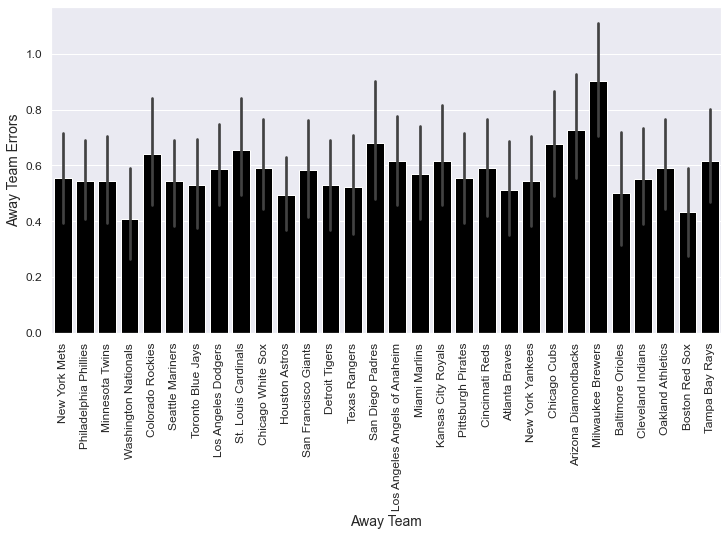

In [226]:

#Media de errores de los equipos como visitantes
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x="away_team", y="away_team_errors", data=partidos, color="black")
plt.xlabel("Away Team", fontsize=14)
plt.ylabel("Away Team Errors", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

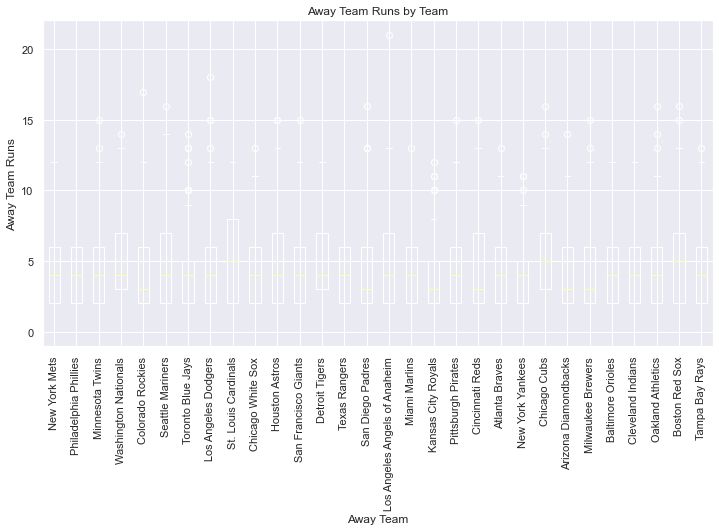

In [227]:
#Media de carrera ganada de los equipos como locales 
plt.figure(figsize=(12, 6))
plt.boxplot(x=[partidos[partidos['away_team']==team]['away_team_runs'] for team in partidos['away_team'].unique()])
plt.xticks(range(1, len(partidos['away_team'].unique())+1), partidos['away_team'].unique(), rotation=90)
plt.title('Away Team Runs by Team')
plt.ylabel('Away Team Runs')
plt.xlabel('Away Team')
plt.show()

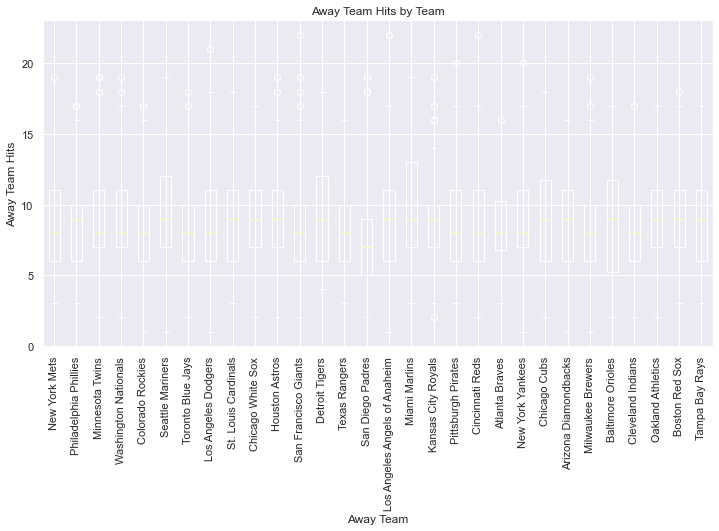

In [228]:
#Media de batzos dados de equipos como visitantes
plt.figure(figsize=(12, 6))
plt.boxplot(x=[partidos[partidos['away_team']==team]['away_team_hits'] for team in partidos['away_team'].unique()])
plt.xticks(range(1, len(partidos['away_team'].unique())+1), partidos['away_team'].unique(), rotation=90)
plt.title('Away Team Hits by Team')
plt.ylabel('Away Team Hits')
plt.xlabel('Away Team')
plt.show()

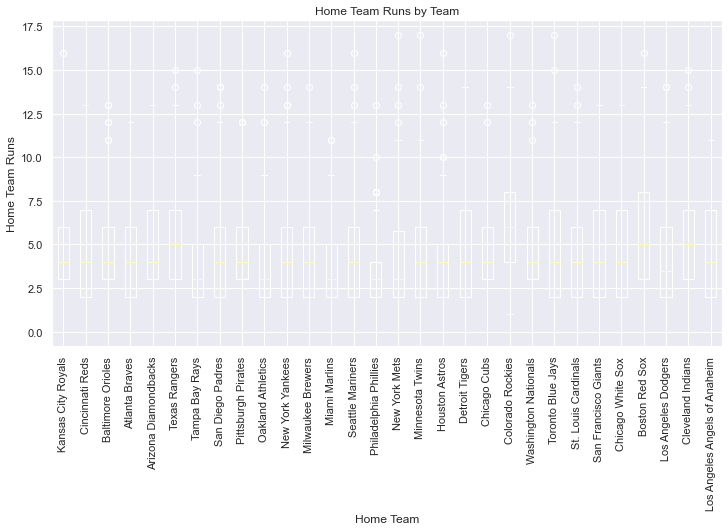

In [229]:
#Media de carreras dados de equipos como locales
plt.figure(figsize=(12, 6))
plt.boxplot(x=[partidos[partidos['home_team']==team]['home_team_runs'] for team in partidos['home_team'].unique()])
plt.xticks(range(1, len(partidos['home_team'].unique())+1), partidos['home_team'].unique(), rotation=90)
plt.title('Home Team Runs by Team')
plt.ylabel('Home Team Runs')
plt.xlabel('Home Team')
plt.show()

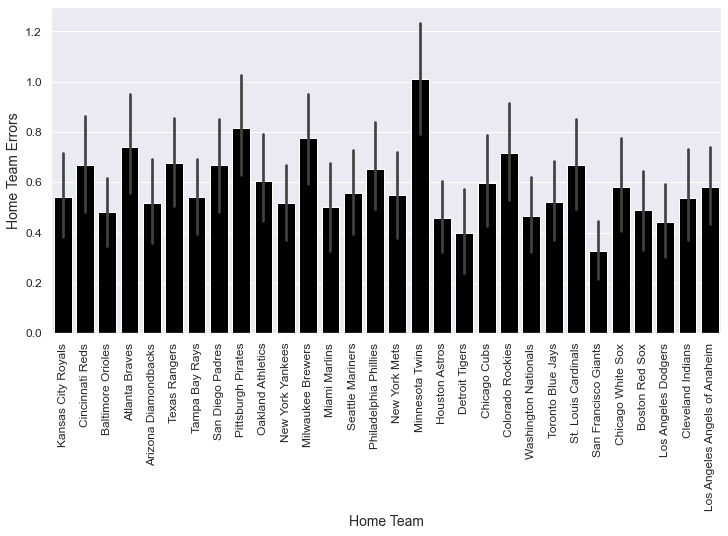

In [230]:
#Media de errores de los equipos como locales
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x="home_team", y="home_team_errors", data=partidos, color="black")
plt.xlabel("Home Team", fontsize=14)
plt.ylabel("Home Team Errors", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### 1.4 Aíslar las variables numéricas & Análisis de correlación

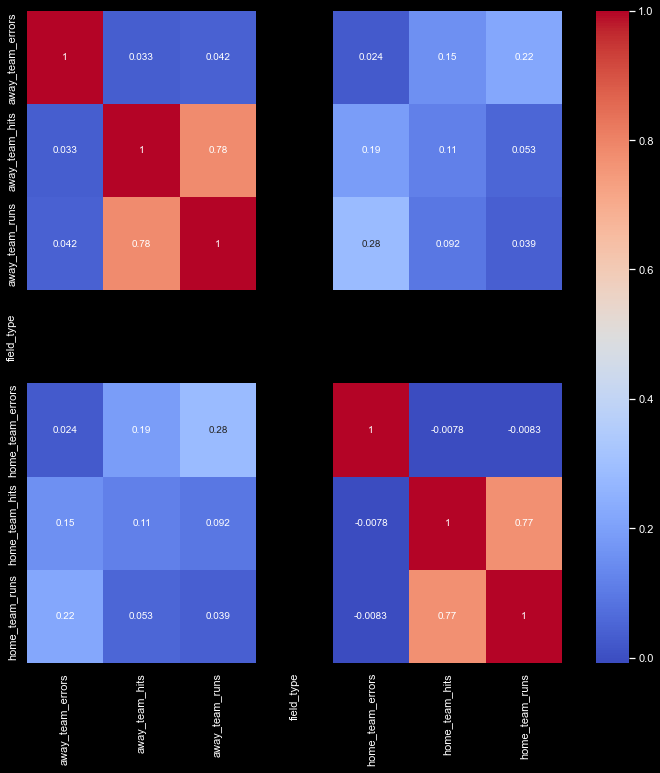

In [231]:
#análisis de correlación entre variables numericas y categoricas
plt.style.use("dark_background")
numeric_vars = partidos.select_dtypes(include=["int64", "float64"])
categorical_vars = partidos.select_dtypes(exclude=["int64", "float64"])
corr = numeric_vars.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

##### 1.5.1 Variables categóricas

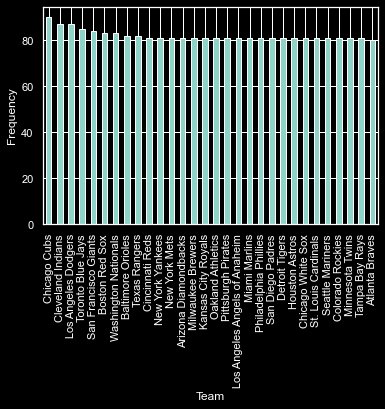

In [232]:
#Cantidad de partidos de los equipos como visitantes
team_counts = partidos["away_team"].value_counts()
team_counts.plot(kind="bar")
plt.xlabel("Team")
plt.ylabel("Frequency")
plt.show()

Bar Plot of away_team


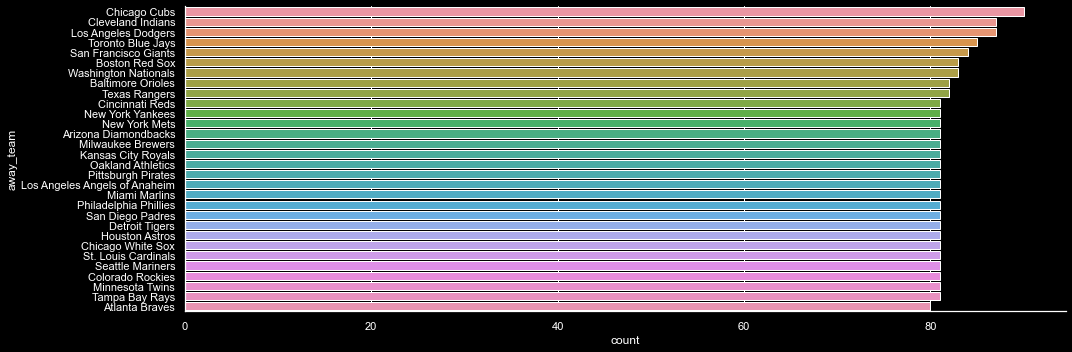

Summary of away_team


count  relative_pct
Chicago Cubs                      90          0.04
Cleveland Indians                 87          0.04
Los Angeles Dodgers               87          0.04
Toronto Blue Jays                 85          0.03
San Francisco Giants              84          0.03
Boston Red Sox                    83          0.03
Washington Nationals              83          0.03
Baltimore Orioles                 82          0.03
Texas Rangers                     82          0.03
Cincinnati Reds                   81          0.03
New York Yankees                  81          0.03
New York Mets                     81          0.03
Arizona Diamondbacks              81          0.03
Milwaukee Brewers                 81          0.03
Kansas City Royals                81          0.03
Oakland Athletics                 81          0.03
Pittsburgh Pirates                81          0.03
Los Angeles Angels of Anaheim     81          0.03
Miami Marlins                     81          0.03
Philadelphia Phillies             81          0.03
San Diego Padres                  81          0.03
Detroit Tigers                    81          0.03
Houston Astros                    81          0.03
Chicago White Sox                 81          0.03
St. Louis Cardinals               81          0.03
Seattle Mariners                  81          0.03
Colorado Rockies                  81          0.03
Minnesota Twins                   81          0.03
Tampa Bay Rays                    81          0.03
Atlanta Braves                    80          0.03

In [233]:
#Cantidad de partidos de los equipos como visitantes
eda_cat(partidos, x = "away_team")

Bar Plot of home_team


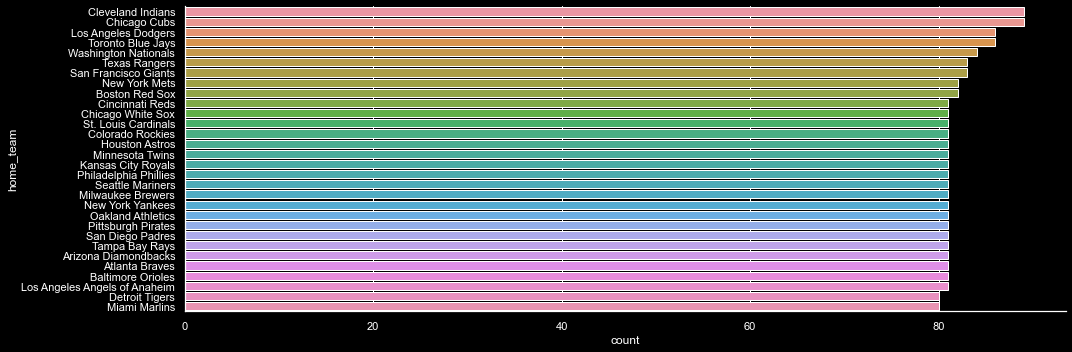

Summary of home_team


count  relative_pct
Cleveland Indians                 89          0.04
Chicago Cubs                      89          0.04
Los Angeles Dodgers               86          0.03
Toronto Blue Jays                 86          0.03
Washington Nationals              84          0.03
Texas Rangers                     83          0.03
San Francisco Giants              83          0.03
New York Mets                     82          0.03
Boston Red Sox                    82          0.03
Cincinnati Reds                   81          0.03
Chicago White Sox                 81          0.03
St. Louis Cardinals               81          0.03
Colorado Rockies                  81          0.03
Houston Astros                    81          0.03
Minnesota Twins                   81          0.03
Kansas City Royals                81          0.03
Philadelphia Phillies             81          0.03
Seattle Mariners                  81          0.03
Milwaukee Brewers                 81          0.03
New York Yankees                  81          0.03
Oakland Athletics                 81          0.03
Pittsburgh Pirates                81          0.03
San Diego Padres                  81          0.03
Tampa Bay Rays                    81          0.03
Arizona Diamondbacks              81          0.03
Atlanta Braves                    81          0.03
Baltimore Orioles                 81          0.03
Los Angeles Angels of Anaheim     81          0.03
Detroit Tigers                    80          0.03
Miami Marlins                     80          0.03

In [234]:
#Cantidad de partidos por equipo como locales
eda_cat(partidos, x = "home_team")

Bar Plot of venue


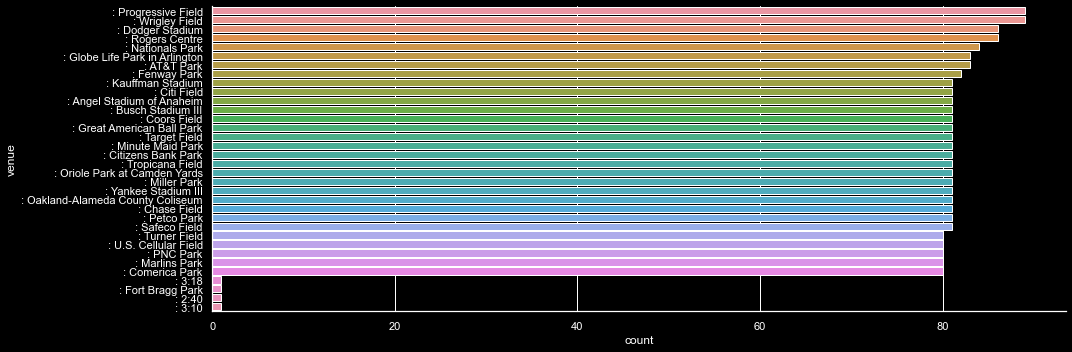

Summary of venue


count  relative_pct
: Progressive Field                   89          0.04
: Wrigley Field                       89          0.04
: Dodger Stadium                      86          0.03
: Rogers Centre                       86          0.03
: Nationals Park                      84          0.03
: Globe Life Park in Arlington        83          0.03
: AT&T Park                           83          0.03
: Fenway Park                         82          0.03
: Kauffman Stadium                    81          0.03
: Citi Field                          81          0.03
: Angel Stadium of Anaheim            81          0.03
: Busch Stadium III                   81          0.03
: Coors Field                         81          0.03
: Great American Ball Park            81          0.03
: Target Field                        81          0.03
: Minute Maid Park                    81          0.03
: Citizens Bank Park                  81          0.03
: Tropicana Field                     81          0.03
: Oriole Park at Camden Yards         81          0.03
: Miller Park                         81          0.03
: Yankee Stadium III                  81          0.03
: Oakland-Alameda County Coliseum     81          0.03
: Chase Field                         81          0.03
: Petco Park                          81          0.03
: Safeco Field                        81          0.03
: Turner Field                        80          0.03
: U.S. Cellular Field                 80          0.03
: PNC Park                            80          0.03
: Marlins Park                        80          0.03
: Comerica Park                       80          0.03
: 3:18                                 1          0.00
: Fort Bragg Park                      1          0.00
: 2:40                                 1          0.00
: 3:10                                 1          0.00

In [235]:
#Venue donde se realizaron mas partidos
eda_cat(partidos, x = "venue")

##### 1.6 Limpieza de variables

In [236]:
#Descartar field_type porque no posee datos
partidos = partidos.drop("field_type", axis=1)

In [237]:
#Cambiar el formato de date y agregar columna
partidos[['weekday', 'month_day', 'year']] = partidos['date'].str.split(',', expand=True)
partidos = partidos.drop('date', axis=1)
dates = partidos['month_day'].str.split(" ")
month = []
day = []
for x in dates:
    day.append(x[2])
    month.append(x[1])
partidos['month'] = month
partidos['day'] = day
partidos = partidos.drop('month_day', axis=1)

In [238]:
#Limpiando gamme_tpe
partidos[['Period', 'field_type']] = partidos['game_type'].str.split(',', expand=True)
partidos = partidos.drop('game_type', axis=1)

In [239]:
#Limpiando StartTime
partidos['start_time'] = partidos['start_time'].str.replace("Start Time: ", "")
partidos['start_time'] = partidos['start_time'].str.replace(" Local", "")


In [240]:
#Cambiar formato de game_duration
partidos['game_duration'] = partidos['game_duration'].str.replace(": ", "0",1) + ":00"
partidos['game_duration'] = pd.to_datetime(partidos['game_duration'], format='%H:%M:%S',errors='coerce').dt.time

In [241]:
#Obteniendo la informacion del clima de other_type_information¡
import re

def extract_weather(other_info_string):
    weather_regex = re.compile(r"Start Time Weather:.*")
    weather = weather_regex.search(other_info_string)
    if weather:
        return weather.group().split(":")[1].strip()
    return None

partidos["start_time_weather"] = partidos["other_info_string"].apply(extract_weather)
partidos['start_time_weather'] = partidos['other_info_string'].str.extract(r'Start Time Weather:.*(\d+&deg; F.*)')
partidos['start_time_weather'] = partidos['start_time_weather'].str.replace(r'</strong>', '')
partidos['start_time_weather'] = partidos['start_time_weather'].str.replace(r'</div>', '')

In [242]:
#Descartar "other_info_string" porque no posee datos relevantes
partidos = partidos.drop("other_info_string", axis=1)

In [243]:
#Limpiar datos de attendance
partidos['attendance'] = partidos['attendance'].astype(str)
partidos['attendance'] = partidos['attendance'].str.replace(',', '')
partidos['attendance'] = partidos['attendance'].str.replace("']", '')
partidos['attendance'] = pd.to_numeric(partidos['attendance'], errors='coerce')
partidos.dropna(subset=['attendance'], inplace=True)
partidos['attendance'] = partidos['attendance'].astype(int)

C:\Users\charl\AppData\Local\Temp\ipykernel_1028\2633976379.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [244]:
#Limpiando veneu
partidos['venue'] = partidos['venue'].astype(str)
partidos['venue']= partidos['venue'].str.replace(': ', '')
partidos.dropna(subset=['venue'], inplace=True)

In [245]:

#Quitando duplicados, estandarizando y descartando datos con valores faltantes
partidos = clean(partidos, method = "duplicates")
partidos = clean(partidos, method = "standardize")
partidos = clean(partidos, method = "dropmissing")

In [246]:
#Se realiza una nueva inspeccion de los datos
explore(partidos, method="summarize")

dtypes  count  null_sum  null_pct  nunique  \
attendance           int32   2460         0       0.0     2374   
away_team           object   2460         0       0.0       30   
away_team_errors     int64   2460         0       0.0        6   
away_team_hits       int64   2460         0       0.0       22   
away_team_runs       int64   2460         0       0.0       20   
boxscore_url        object   2460         0       0.0     2460   
day                 object   2460         0       0.0       31   
field_type          object   2460         0       0.0        2   
game_duration       object   2460         0       0.0      168   
home_team           object   2460         0       0.0       30   
home_team_errors     int64   2460         0       0.0        6   
home_team_hits       int64   2460         0       0.0       23   
home_team_runs       int64   2460         0       0.0       18   
month               object   2460         0       0.0        8   
period              object   2460         0       0.0        2   
start_time          object   2460         0       0.0      207   
start_time_weather  object   2460         0       0.0     1633   
venue               object   2460         0       0.0       31   
weekday             object   2460         0       0.0        7   
year                object   2460         0       0.0        1   

                                                                  min  \
attendance                                                       8766   
away_team                                        Arizona Diamondbacks   
away_team_errors                                                    0   
away_team_hits                                                      1   
away_team_runs                                                      0   
boxscore_url        https://www.baseball-reference.com/boxes/ANA/A...   
day                                                                 1   
field_type                                                   on grass   
game_duration                                                01:15:00   
home_team                                        Arizona Diamondbacks   
home_team_errors                                                    0   
home_team_hits                                                      0   
home_team_runs                                                      0   
month                                                           April   
period                                                       Day Game   
start_time                                                 11:05 a.m.   
start_time_weather                      0&deg; F, Wind 0mph, In Dome.   
venue                                                       AT&T Park   
weekday                                                        Friday   
year                                                             2016   

                        25%      50%       75%  \
attendance          22432.0  30604.5  38396.25   
away_team                 -        -         -   
away_team_errors        0.0      0.0       1.0   
away_team_hits          6.0      8.0      11.0   
away_team_runs          2.0      4.0       6.0   
boxscore_url              -        -         -   
day                       -        -         -   
field_type                -        -         -   
game_duration             -        -         -   
home_team                 -        -         -   
home_team_errors        0.0      0.0       1.0   
home_team_hits          6.0      8.0      11.0   
home_team_runs          2.0      4.0       6.0   
month                     -        -         -   
period                    -        -         -   
start_time                -        -         -   
start_time_weather        -        -         -   
venue                     -        -         -   
weekday                   -        -         -   
year                      -        -         -   

                                                

In [247]:
#Para poder comparar de mejor manera se escribe un csv con los datos ya cambiados del df
partidos.to_csv("nuevo_dataset.csv", index=False)

##### 1.5.2 Variables Categoricas nuevas

<AxesSubplot:ylabel='weekday'>

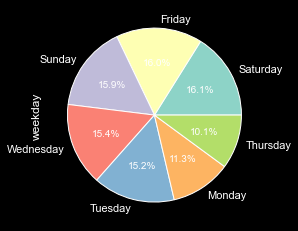

In [248]:
#Dias con mas juegos
weekday_counts = partidos['weekday'].value_counts()
weekday_counts.plot.pie(autopct='%1.1f%%')

Bar Plot of period


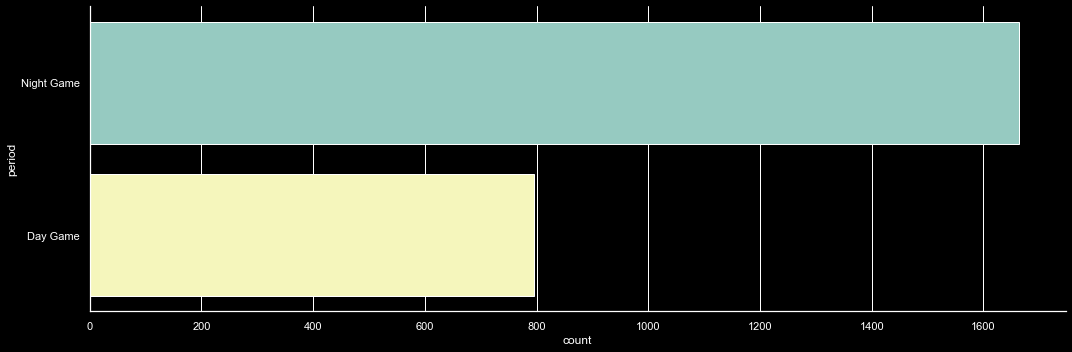

Summary of period


count  relative_pct
Night Game   1664          0.68
Day Game      796          0.32

In [249]:
#Periodo del dia con mas juegos
eda_cat(partidos, x = "period")

Bar Plot of field_type


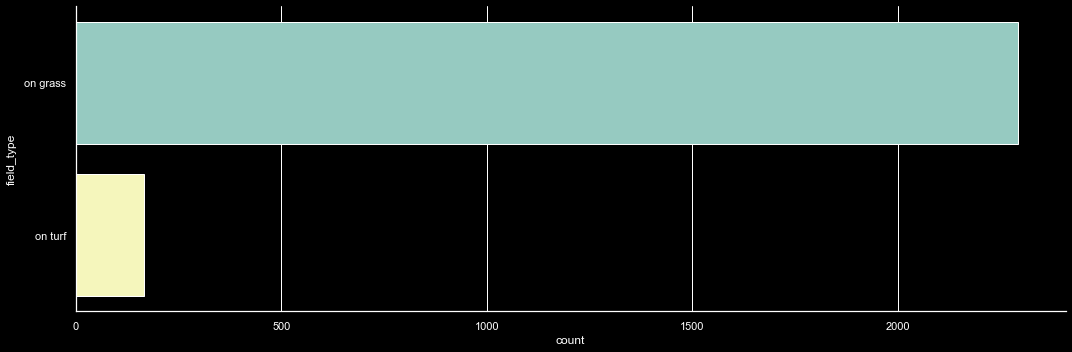

Summary of field_type


count  relative_pct
 on grass   2293          0.93
 on turf     167          0.07

In [250]:
#Tipo de campo con mas juegos
eda_cat(partidos, x = "field_type")

<AxesSubplot:ylabel='month'>

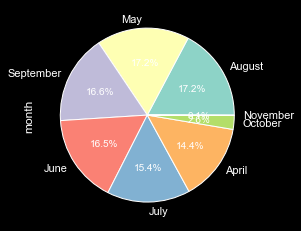

In [251]:
#Mes con mas juegos
weekday_counts = partidos['month'].value_counts()
weekday_counts.plot.pie(autopct='%1.1f%%')

Outlier Analysis - Boxplot


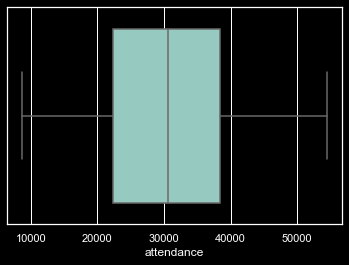

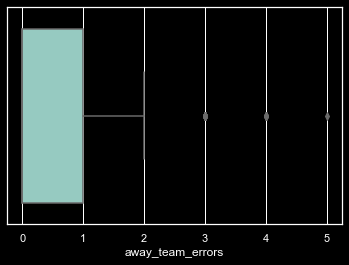

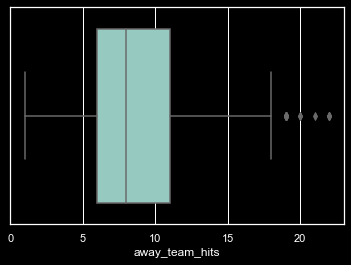

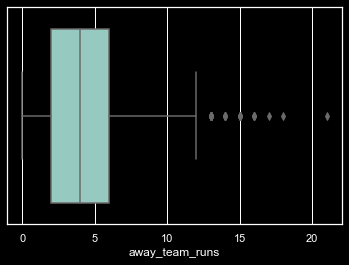

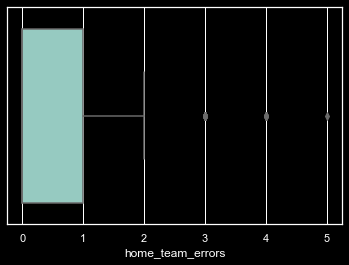

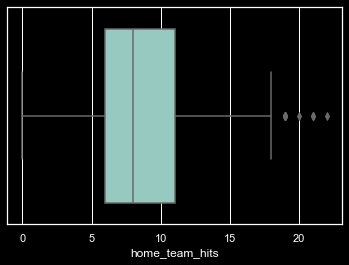

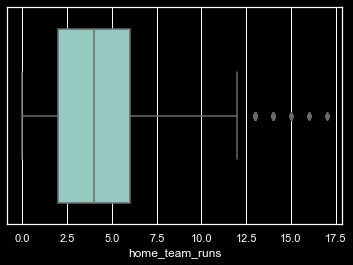

Distribution Analysis - Histogram


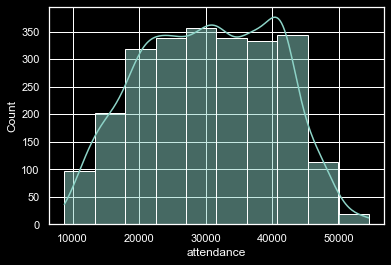

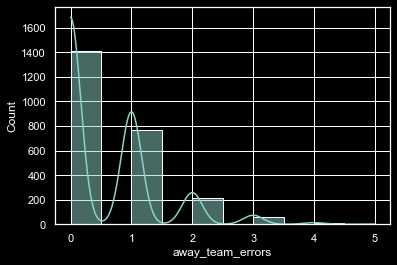

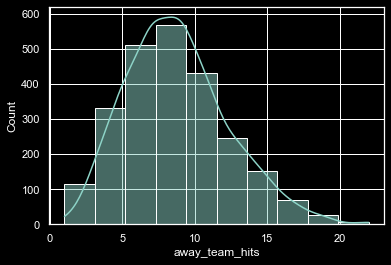

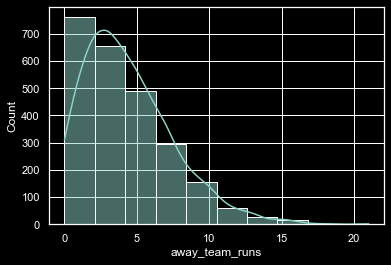

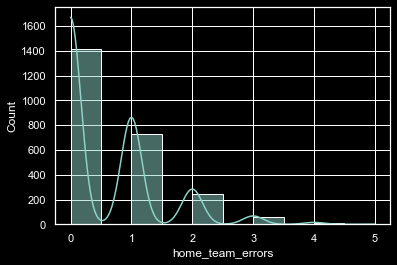

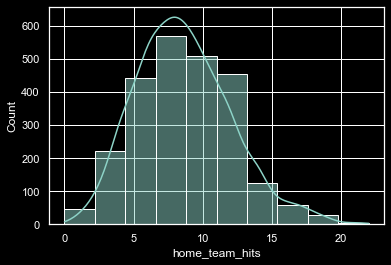

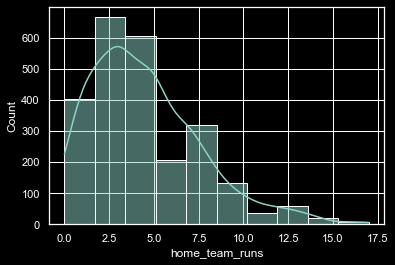

In [252]:
#Analisis generales de los valores numericos
eda_num(partidos)

## Parte 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data_limpia = pd.read_csv("nuevo_dataset.csv")
data_limpia = data_limpia.drop("boxscore_url", axis=1)
data_limpia = data_limpia.drop("field_type", axis=1)
data_limpia = data_limpia.drop("start_time_weather", axis=1)

In [ ]:
x = data_limpia.iloc[:, 1:]
y = data_limpia.iloc[:, 0]

In [ ]:
variables = ["away_team", "home_team", "month", "game_duration", "weekday", "period", "start_time", "venue", "day", "year"]
for variable in variables:
    data_dummy = pd.get_dummies(x[[variable]])
    resultado_data = pd.concat([x, data_dummy], axis = 1)
    resultado_data = resultado_data.drop([variable], axis = 1)

    x = resultado_data

In [ ]:
variable_x_train, variable_x, variable_y_train, variable_y = train_test_split(x, y, test_size = 0.2, random_state = 1)
resultado_regresion = LinearRegression()
resultado_regresion.fit(variable_x_train, variable_y_train)
valor_r_cuadrado = resultado_regresion.score(variable_x_train, variable_y_train)

In [ ]:
valor_r_cuadrado